# Trading Telegram Bot

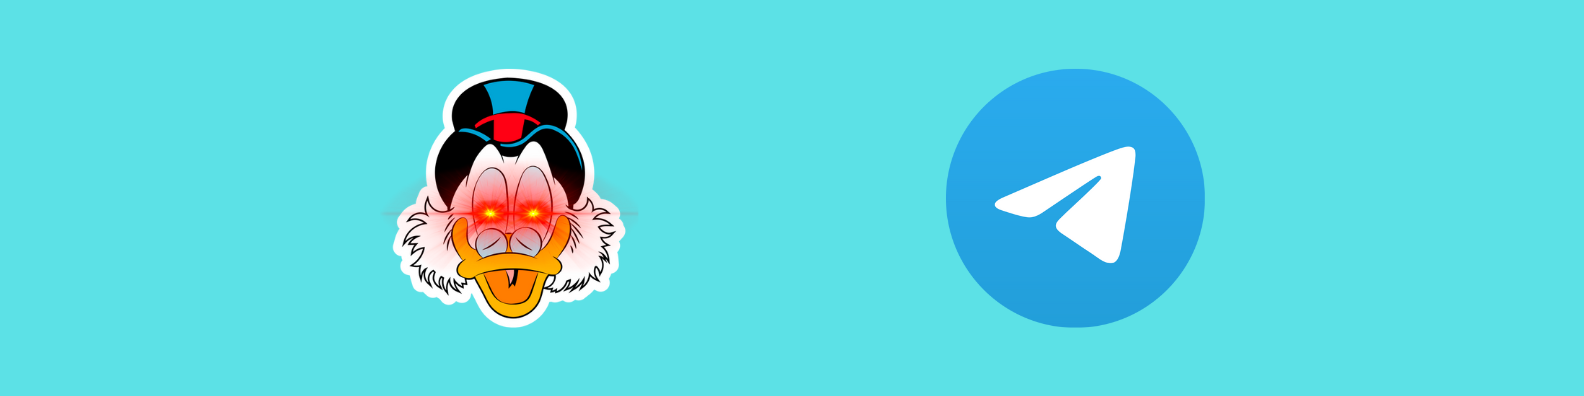

## Problem Statement

El objetivo de este proyecto es el desarrollo de un bot en la plataforma de mensajería *Telegram*, cuyo propósito será el de informar de la cotización de los diferentes instrumentos financieros proporcionados por *MetaTrader 5*, herramienta gratuita para tráders que permite realizar análisis técnico y ejecutar operaciones comerciales en fórex y las bolsas; utilizando como bróker a *Darwinex*, que permite hacer trading en diferentes activos financieros.

## Data Collection

Para llevar a cabo este proyecto, se extraen las cotizaciones de los instrumentos financieros en tiempo real a través de *MetaTrader 5*, utilizando como bróker a *Darwinex*.

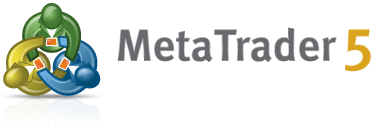

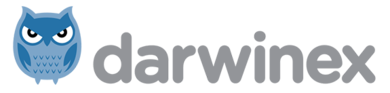

## Import Packages

In [1]:
from datetime import datetime
import MetaTrader5 as mt5
import json
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Data Extraction

In [2]:
# Credentials

credentials = {
    'path': 'C:\\Program Files\\Darwinex MetaTrader 5\\terminal64.exe',
    'login': ...,
    'password': '...',
    'server': '...',
    'timeout': 60000,
    'portable': False
}

In [3]:
# Define function

def get_data(symbol, n, timeframe=mt5.TIMEFRAME_D1):
    """ Function to import the data of the chosen symbol"""
    # Initialize the connection if there is not
    mt5.initialize(path=credentials['path'], login=credentials['login'],
                   password=credentials['password'], server=credentials['server'],
                   timeout=credentials['timeout'], portable=credentials['portable'])
    # Current date extract
    utc_from = datetime.now()
    # Import the data into a tuple
    rates = mt5.copy_rates_from(symbol, timeframe, utc_from, n)
    # Tuple to dataframe
    rates_frame = pd.DataFrame(rates)
    # Convert time in seconds into the datetime format
    rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')
    # Convert the column "time" in the right format
    rates_frame['time'] = pd.to_datetime(rates_frame['time'], format='%Y-%m-%d')
    return rates_frame

In [4]:
# Select symbols

df = get_data(symbol='EURUSD', n=1, timeframe=mt5.TIMEFRAME_D1)
df2 = get_data(symbol='SPA35', n=1, timeframe=mt5.TIMEFRAME_D1)
df3 = get_data(symbol='AAPL', n=1, timeframe=mt5.TIMEFRAME_D1)

## Bot messages

In [5]:
message = f'Cotización Euro / Dólar [EURUSD]\n\
\nDate: {df.iloc[0]["time"].date()}\
\nOpen: {df.iloc[0]["open"]}\
\nClose: {df.iloc[0]["close"]}\
\nHigh: {df.iloc[0]["high"]}\
\nLow: {df.iloc[0]["low"]}'

message2 = f'Cotización IBEX 35\n\
\nDate: {df2.iloc[0]["time"].date()}\
\nOpen: {df2.iloc[0]["open"]}\
\nClose: {df2.iloc[0]["close"]}\
\nHigh: {df2.iloc[0]["high"]}\
\nLow: {df2.iloc[0]["low"]}'

message3 = f'Cotización Apple Inc\n\
\nDate: {df3.iloc[0]["time"].date()}\
\nOpen: {df3.iloc[0]["open"]}\
\nClose: {df3.iloc[0]["close"]}\
\nHigh: {df3.iloc[0]["high"]}\
\nLow: {df3.iloc[0]["low"]}'

## Creating the Telegram Bot

In [6]:
import telegram
from telegram.ext import Updater
from telegram.ext import CommandHandler

telegram_bot_token = '...'

updater = Updater(token=telegram_bot_token, use_context=True)
dispatcher = updater.dispatcher

def start(update, context):
    chat_id = update.effective_chat.id
    context.bot.send_message(chat_id=chat_id, text='Hola, escoja un índice del que quiera información')
    
def EURUSD(update, context):
    chat_id = update.effective_chat.id
    context.bot.send_message(chat_id=chat_id, text=message)
    
def SPA35(update, context):
    chat_id = update.effective_chat.id
    context.bot.send_message(chat_id=chat_id, text=message2)
    
def AAPL(update, context):
    chat_id = update.effective_chat.id
    context.bot.send_message(chat_id=chat_id, text=message3)

dispatcher.add_handler(CommandHandler('start', start))
dispatcher.add_handler(CommandHandler('EURUSD', EURUSD))
dispatcher.add_handler(CommandHandler('SPA35', SPA35))
dispatcher.add_handler(CommandHandler('AAPL', AAPL))
updater.start_polling()